In [1]:
#استيراد المكتبات اللازمة
import pandas as pd

In [34]:
# تحميل ملف البيانات في إطار بيانات
df= pd.read_csv('vehicles.csv')

In [3]:
#إظهار معلومات اطار البيانات
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [35]:
#  حذف الأعمدة الغير ذات صلة والأعمدة التي على عدد كبير من القيم المفقودة
df = df.drop(columns=['id', 'url', 'region_url', 'image_url', 'description', 'posting_date', 'county', 'size','VIN'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  state         426880 non-null  object 
 15  lat           420331 non-null  float64
 16  long          420331 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usage

In [ ]:
# معالجة القيم المفقودة
# فصل الأعمدة الرقمية عن الأعمدة الفئوية
mode_cols = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'paint_color']
median_cols = ['year', 'odometer', 'lat', 'long']

#استبدال القيم الناقصة بالقيمة الأكثر تكرارا بالنسبة للأعمدة الفئوية
#استبدال القيم الناقصة بالوسيط للأعمدة الرقمية
for col in mode_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in median_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\Delux Tech\AppData\Local\Temp\ipykernel_6788\49551337.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Delux Tech\AppData\Local\Temp\ipykernel_6788\49551337.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [ ]:
# حذف الأسطر ذات القيم الفارغة في العمود الهدف 
df = df.dropna(subset=[ 'type'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334022 entries, 27 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        334022 non-null  object 
 1   price         334022 non-null  int64  
 2   year          334022 non-null  float64
 3   manufacturer  334022 non-null  object 
 4   model         334022 non-null  object 
 5   condition     334022 non-null  object 
 6   cylinders     334022 non-null  object 
 7   fuel          334022 non-null  object 
 8   odometer      334022 non-null  float64
 9   title_status  334022 non-null  object 
 10  transmission  334022 non-null  object 
 11  drive         334022 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   334022 non-null  object 
 14  state         334022 non-null  object 
 15  lat           334022 non-null  float64
 16  long          334022 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usage: 45

In [ ]:
import pandas as pd
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

# تحديد العمود الهدف والأعمدة الفئوية
target_column = 'type'
categorical_columns = ['region', 'manufacturer', 'model','condition', 'cylinders', 'fuel','title_status', 'transmission', 'drive', 'paint_color','state']

# ترميز العمود الهدف
label_encoder = LabelEncoder()
df['type_numeric'] = label_encoder.fit_transform(df['type'])

# ترميز الأعمدة الفئوية
encoder = ce.TargetEncoder(cols=categorical_columns)

df_encoded = encoder.fit_transform(df[categorical_columns], df['type_numeric'])

#حذف الأعمدة الفئوية وإضافة الأعمدة التي قمنا بترميزها
df_final = pd.concat([df.drop(columns=categorical_columns), df_encoded], axis=1)




    price    year  odometer    type     lat     long  type_numeric    region  \
27  33590  2014.0   57923.0  pickup  32.590 -85.4800             8  6.172661   
28  22590  2010.0   71229.0  pickup  32.590 -85.4800             8  6.172661   
29  39590  2020.0   19160.0  pickup  32.590 -85.4800             8  6.172661   
30  30990  2017.0   41124.0  pickup  32.590 -85.4800             8  6.172661   
31  15000  2013.0  128000.0   truck  32.592 -85.5189            10  6.172661   

    manufacturer     model  condition  cylinders      fuel  title_status  \
27      6.080630  8.000000   6.222924   6.876543  5.844241      6.080403   
28      6.408399  9.032329   6.222924   6.876543  5.844241      6.080403   
29      6.408399  8.079051   6.222924   6.876543  5.844241      6.080403   
30      6.552744  8.000000   6.222924   6.876543  5.844241      6.080403   
31      6.638592  9.000000   5.722196   5.857592  5.844241      6.080403   

    transmission     drive  paint_color     state  
27      6.

In [40]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334022 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         334022 non-null  int64  
 1   year          334022 non-null  float64
 2   odometer      334022 non-null  float64
 3   type          334022 non-null  object 
 4   lat           334022 non-null  float64
 5   long          334022 non-null  float64
 6   type_numeric  334022 non-null  int32  
 7   region        334022 non-null  float64
 8   manufacturer  334022 non-null  float64
 9   model         334022 non-null  float64
 10  condition     334022 non-null  float64
 11  cylinders     334022 non-null  float64
 12  fuel          334022 non-null  float64
 13  title_status  334022 non-null  float64
 14  transmission  334022 non-null  float64
 15  drive         334022 non-null  float64
 16  paint_color   334022 non-null  float64
 17  state         334022 non-null  float64
dtypes: float

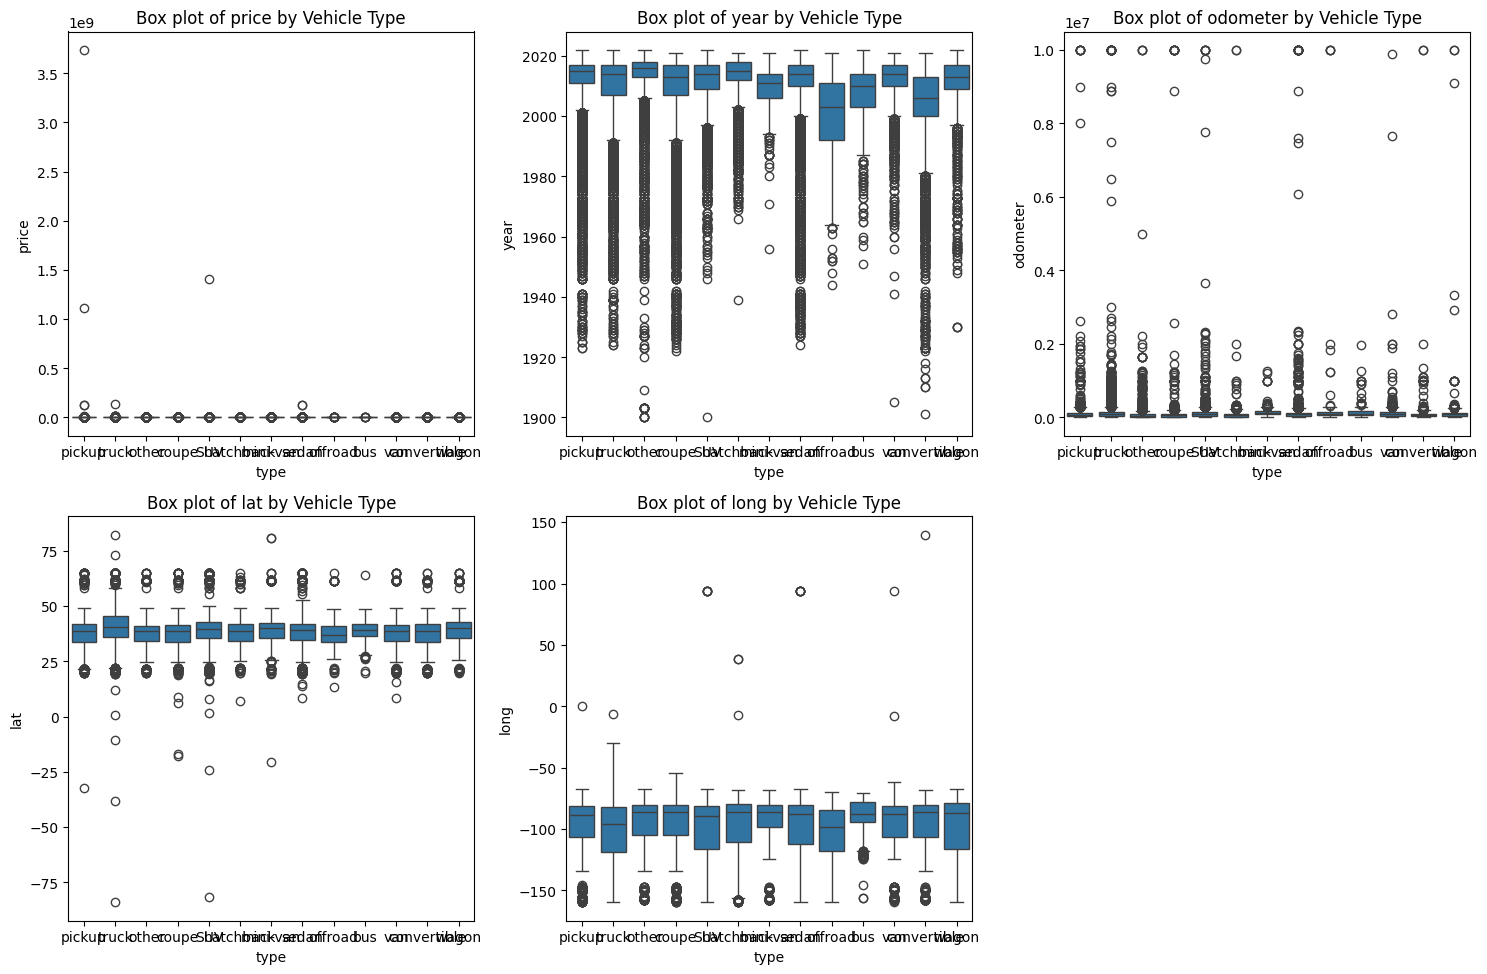

In [ ]:
#رسم المخطط الصندوقي للأعمدة الرقمية
import seaborn as sns
import matplotlib.pyplot as plt

# تحديد الأعمدة الرقمية
numeric_columns = ['price', 'year', 'odometer', 'lat', 'long']

#رسم المخططات
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='type', y=column)
    plt.title(f'Box plot of {column} by Vehicle Type')
plt.tight_layout()
plt.show()


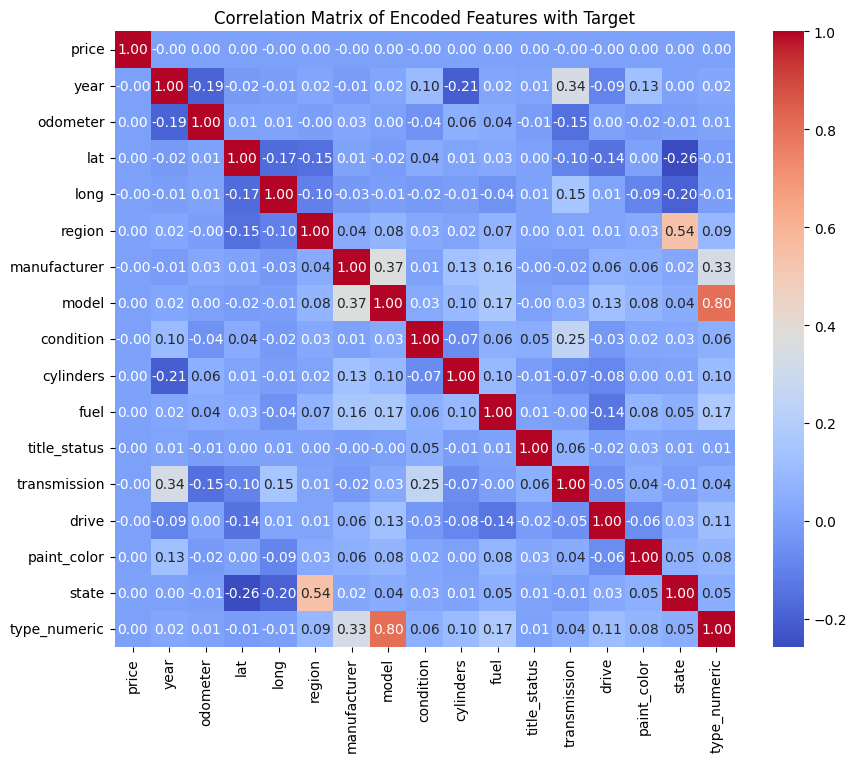

In [ ]:
# رسم مصفوفة الارتباط بين الأعمدة والعمود الهدف
import category_encoders as ce

# Target Encoding for categorical columns
encoder = ce.TargetEncoder(cols=categorical_columns)
df_encoded = encoder.fit_transform(df[categorical_columns], df['type_numeric'])  # Assuming 'type_numeric' is the label-encoded target

# Concatenate the encoded columns with the numeric features
df_final = pd.concat([df[numeric_columns], df_encoded], axis=1)
df_final['type_numeric'] = df['type_numeric']  # Adding the encoded target back

# Calculate and plot correlation matrix
correlation_matrix = df_final.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Encoded Features with Target")
plt.show()


In [ ]:
# حذف الأعمدة الغير ذات صلة بالخرج
df_final = df_final.drop(columns=['price', 'year', 'odometer', 'lat', 'long','condition', 'transmission','title_status','state', 'paint_color'])

In [44]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334022 entries, 27 to 426879
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        334022 non-null  float64
 1   manufacturer  334022 non-null  float64
 2   model         334022 non-null  float64
 3   cylinders     334022 non-null  float64
 4   fuel          334022 non-null  float64
 5   drive         334022 non-null  float64
 6   type_numeric  334022 non-null  int32  
dtypes: float64(6), int32(1)
memory usage: 19.1 MB


In [ ]:
#تقسيم البيانات إلى مجموعتي تدريب واختبار
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named df and target column is 'type_numeric'
X = df_final.drop(columns=['type_numeric'])  # Features
y = df_final['type_numeric']  # Target

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (267217, 6)
Testing set size: (66805, 6)


In [ ]:
# بناء نموذج الانحدار اللوجستي
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# تهيئة النموذج
model = LogisticRegression(max_iter=1000, random_state=42)  

# التدريب
model.fit(X_train, y_train)

# التوقع
y_pred = model.predict(X_test)

# حساب المقاييس
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# طباعة النتائج
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5765137340019459
Precision: 0.5095083035248615
Recall: 0.5765137340019459
F1 Score: 0.517004797737507

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.92      0.79     15402
           1       0.00      0.00      0.00        93
           2       0.00      0.00      0.00      1569
           3       0.48      0.26      0.33      3792
           4       0.47      0.25      0.33      3388
           5       0.67      0.00      0.00       999
           6       0.00      0.00      0.00       126
           7       0.41      0.15      0.22      4388
           8       0.43      0.45      0.44      8660
           9       0.57      0.87      0.69     17290
          10       0.55      0.39      0.46      7172
          11       0.00      0.00      0.00      1752
          12       0.00      0.00      0.00      2174

    accuracy                           0.58     66805
   macro avg       0.33      0.25      0.25     6

c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in lab

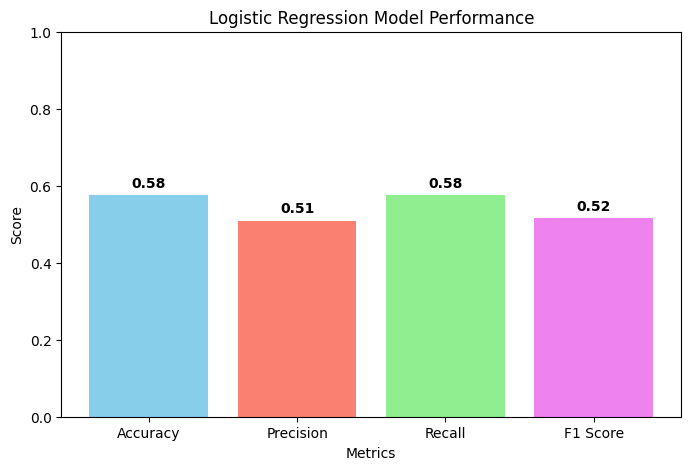

In [ ]:
#رسم مقاييس نموذج الانحدار اللوجستي
import matplotlib.pyplot as plt
import seaborn as sns


# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

# Bar chart for overall metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['skyblue', 'salmon', 'lightgreen', 'violet'])
plt.ylim(0, 1)
plt.title('Logistic Regression Model Performance')
plt.xlabel('Metrics')
plt.ylabel('Score')
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.savefig('Logistic Regression Model Performance.png')
plt.show()

In [ ]:
#بناء نموذج شجرة القرار
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# تهيئة النموذج
dt_model = DecisionTreeClassifier(random_state=42)

# التدريب
dt_model.fit(X_train, y_train)

# التوقع
y_pred = dt_model.predict(X_test)

# حساب المقاييس
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# طباعة النتائج
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# طباعة تفاصيل تقرير التصنيف
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8411795524287105
Precision: 0.8402068967384018
Recall: 0.8411795524287105
F1 Score: 0.8405739455548921

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     15402
           1       0.64      0.58      0.61        93
           2       0.70      0.70      0.70      1569
           3       0.77      0.80      0.79      3792
           4       0.78      0.79      0.79      3388
           5       0.72      0.75      0.73       999
           6       0.25      0.18      0.21       126
           7       0.70      0.67      0.69      4388
           8       0.83      0.84      0.84      8660
           9       0.93      0.92      0.92     17290
          10       0.80      0.78      0.79      7172
          11       0.80      0.76      0.78      1752
          12       0.68      0.64      0.66      2174

    accuracy                           0.84     66805
   macro avg       0.73      0.72      0.72     6

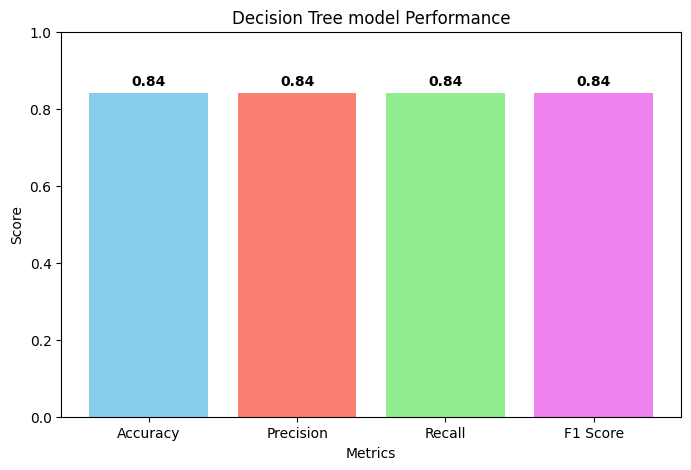

In [ ]:
#رسم مقاييس نموذج شجرة القرار
import matplotlib.pyplot as plt
import seaborn as sns


# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

# Bar chart for overall metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['skyblue', 'salmon', 'lightgreen', 'violet'])
plt.ylim(0, 1)
plt.title('Decision Tree model Performance')
plt.xlabel('Metrics')
plt.ylabel('Score')
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.savefig('Decision Tree model Performance.png')
plt.show()

In [ ]:
#بناء نموذج باييز
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# تهيئة النموذج
nb_model = GaussianNB()

# التدريب
nb_model.fit(X_train, y_train)

# التوقع
y_pred = nb_model.predict(X_test)

# حساب المقاييس
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# طباعة النتائج
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# طباعة تفاصيل تقرير التصنيف
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5560062869545692
Precision: 0.5338616142652116
Recall: 0.5560062869545692
F1 Score: 0.5153485891216913

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     15402
           1       0.17      0.23      0.20        93
           2       0.09      0.00      0.00      1569
           3       0.35      0.49      0.41      3792
           4       0.31      0.54      0.40      3388
           5       0.18      0.29      0.22       999
           6       0.00      0.00      0.00       126
           7       0.15      0.01      0.03      4388
           8       0.50      0.29      0.37      8660
           9       0.58      0.88      0.70     17290
          10       0.53      0.40      0.45      7172
          11       0.20      0.10      0.13      1752
          12       0.85      0.10      0.18      2174

    accuracy                           0.56     66805
   macro avg       0.36      0.32      0.30     6

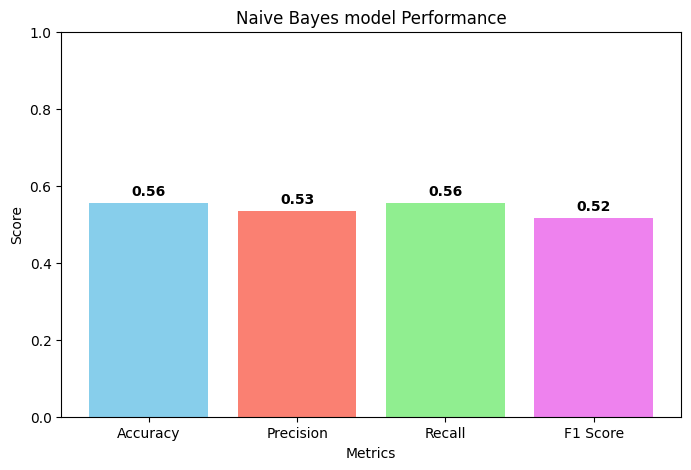

In [ ]:
#رسم مقاييس نموذج باييز
import matplotlib.pyplot as plt
import seaborn as sns


# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

# Bar chart for overall metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['skyblue', 'salmon', 'lightgreen', 'violet'])
plt.ylim(0, 1)
plt.title('Naive Bayes model Performance')
plt.xlabel('Metrics')
plt.ylabel('Score')
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.savefig('Naive Bayes model Performance.png')
plt.show()